<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/07_Boston_Housing_Regression_Model_for_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Model for Supervised Machine Learning using Scikit-Learn**

Installing Kaggle Package to access the Boston Housing Prices dataset from Kaggle.

In [1]:
!pip install kaggle

Make .kaggle directory under root to import the Kaggle Authentication JSON.

In [0]:
!mkdir ~/.kaggle

Change file path to root/.kaggle/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Protect Kaggle JSON file for security reasons

Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Import the Boston Housing Prices dataset for bulding the regression model for supervised learning.

In [4]:
!kaggle datasets download -d altavish/boston-housing-dataset

  0% 0.00/11.7k [00:00<?, ?B/s]
100% 11.7k/11.7k [00:00<00:00, 11.2MB/s]


In [0]:
import pandas as pd

# Import the test and train datasets into pandas dataframe
boston = pd.read_csv('boston-housing-dataset.zip', compression='zip', header=0, sep=',', quotechar='"')

In [19]:
print(boston)

        CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273     21.0  391.99    NaN  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


Creating feature and target arrays

In [0]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

Predicting house value from a single feature, i.e. the number of rooms in a unit, in this case.

In [21]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [0]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

Plotting price of the house vs. number of rooms

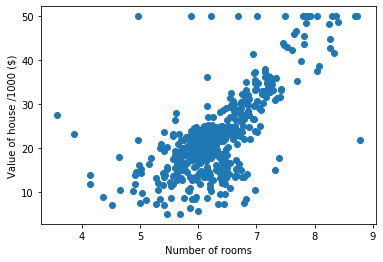

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

**Fitting a regression model**

In [0]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),
max(X_rooms)).reshape(-1, 1)

Plotting the regression line

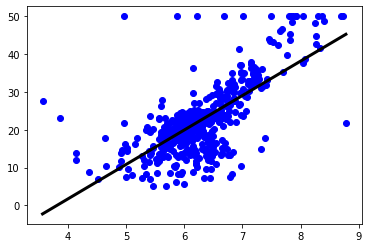

In [26]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
color='black', linewidth=3)
plt.show()